In [2]:
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
import matplotlib.collections as mc
from scipy.optimize import minimize
import networkx as nx
from scipy import sparse
import osqp
from hypertiling import HyperbolicTiling
from hypertiling.graphics.plot import plot_tiling

In [82]:
H = []
with open("./codes/code.txt", 'r') as file:
    for line in file:
        H.append([int(digit) for digit in line.strip()])
H = np.array(H)


n = H.shape[1]
m = H.shape[0]
m1 = 80
m2 = m - 80

# connectivity graph
# G = nx.Graph()
# for i in np.arange(n):
#     G.add_node(i)
#     G.nodes[i]['type'] = 'k'

# for i in range(m):
#     checks = np.where(H[i])[0]
#     for pair in itertools.combinations(checks, 2):
#         G.add_edge(pair[0], pair[1])
# len(G.edges)



# G = nx.algorithms.bipartite.from_biadjacency_matrix(H)
# G = nx.from_numpy_array(H)

G = nx.Graph()
G.add_nodes_from(np.arange(n+m))

for i in range(n):
    G.nodes[i]['type'] = 'k'
for i in range(m1):
    G.nodes[i+n]['type'] = 'r'
# #     # x gen
    for j in range(n):
        if H[i][j]: 
            G.add_edge(j, i+n)

for i in range(m2):
    G.nodes[i+m1+n]['type'] = 'b'
# #     #z gen
    for j in range(n):
        if H[i+m1][j]: 
            G.add_edge(j, i+m1+n)
n = n+m

edge_matrix = np.zeros((G.number_of_edges(), G.number_of_nodes()))
for i, e in enumerate(G.edges()):
    edge_matrix[i][e[0]] = 1
    edge_matrix[i][e[1]] = -1

P = edge_matrix.T @ edge_matrix
P = sparse.csc_matrix(P)

KeyboardInterrupt: 

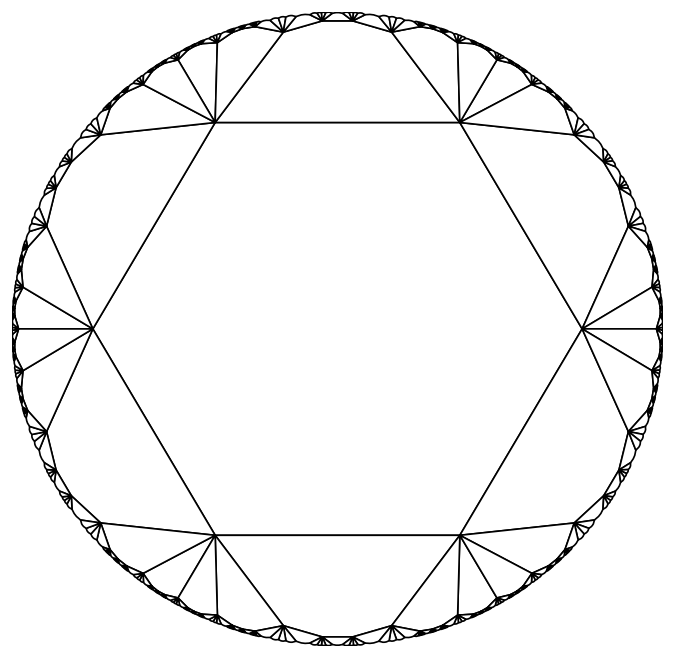

In [41]:
def repetition_code(n, periodic=False):
    # generates the parity check matrix for a repitition code with parameters [n, 1, n]

    shape = (n, n) if periodic else (n-1, n)
    H = np.zeros(shape, dtype=int)
    for i in range(n-1):
        H[i][i] = 1
        H[i][i+1] = 1
    if periodic:
        H[-1][0] = 1
        H[-1][-1] = 1

    return H

# H = repetition_code(7, periodic=True)

# configuration model
# https://en.wikipedia.org/wiki/Configuration_model

# n = 16
# deg_v = 3 # w_c. Every bit is in this many checks
# deg_c = 4 # w_r. Every check has this many bits in it
# num_checks = (n*deg_v)//deg_c
# k = n - num_checks

# vs = np.array([[j for i in range(deg_v)] for j in range(n)]).flatten()
# cs = np.array([[j for i in range(deg_c)] for j in range(num_checks)]).flatten()

# H = np.zeros((num_checks, n), dtype=bool)

# while (vs.size and cs.size):
#     # choose random 'stub' from each array
#     double_edge = True
#     while(double_edge):
#         v_ind = np.random.randint(0, len(vs))
#         c_ind = np.random.randint(0, len(cs))

#         if (H[cs[c_ind]][vs[v_ind]] != 1):
#             double_edge = False
#             H[cs[c_ind]][vs[v_ind]] = 1
#             vs = np.delete(vs, v_ind)
#             cs =np.delete(cs, c_ind)

# H = sparse.csc_matrix(H)

# hx1 = sparse.kron(H, np.eye(H.shape[1], dtype=bool))
# hx2 = sparse.kron(np.eye(H.shape[0], dtype=bool), H.T)
# Hx = sparse.csr_matrix(sparse.hstack([hx1, hx2]))

# hz1 = sparse.kron(np.eye(H.shape[1], dtype=bool), H)
# hz2 = sparse.kron(H.T, np.eye(H.shape[0], dtype=bool))
# Hz = sparse.csr_matrix(sparse.hstack([hz1, hz2]))

# H = sparse.csr_matrix(sparse.vstack([Hx, Hz]))
# # print(H.toarray())

# n = H.shape[1]
# m = H.shape[0]
# m1 = Hx.shape[0]
# m2 = Hz.shape[0]

# G = nx.algorithms.bipartite.from_biadjacency_matrix(H)
# G = nx.Graph()
# G.add_nodes_from(np.arange(n+m))

# for i in range(n):
#     G.nodes[i]['type'] = 'k'
# for i in range(m1):
#     G.nodes[i+n]['type'] = 'r'
# # #     # x gen
#     for j in range(n):
#         if Hx.toarray()[i][j]: G.add_edge(i+n, j)

# for i in range(m2):
#     G.nodes[i+m1+n]['type'] = 'b'
# # #     #z gen
#     for j in range(n):
#         if Hz.toarray()[i+m1][j]: G.add_edge(i+m1+n, j)
# n = n+m

# connectivity graph
# G = nx.Graph()
# for i in np.arange(n):
#     G.add_node(i)
#     G.nodes[i]['type'] = 'k'

# for i in range(m):
#     checks = H[i].indices
#     for pair in itertools.combinations(checks, 2):
#         G.add_edge(pair[0], pair[1])
# # len(G.edges)

p = 6
q = 7
nlayers = 3

T = HyperbolicTiling(p, q, nlayers, kernel="SR")
plot_tiling(T)

H = np.zeros((len(T), len(T)))
for i in range(len(T)):
    for j in T.get_nbrs()[i]:
        H[i][j] = 1

G = nx.from_numpy_array(H)
n = G.number_of_nodes()
for i in np.arange(n):
    G.nodes[i]['type'] = 'k'

edge_matrix = np.zeros((G.number_of_edges(), G.number_of_nodes()))
for i, e in enumerate(G.edges()):
    edge_matrix[i][e[0]] = 1
    edge_matrix[i][e[1]] = -1

P = edge_matrix.T @ edge_matrix
P = sparse.csc_matrix(P)

In [83]:
def print_graph(G, edges=False):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    lines = []
    xs = []
    ys = []
    cs = []
    
    for i in range(G.number_of_nodes()):
        v = G.nodes[i]
        xs.append(v['x'])
        ys.append(v['y'])
        cs.append(v['type'])
        for nbr in G.neighbors(i):
            lines.append([(v['x'], v['y']), (G.nodes[nbr]['x'], G.nodes[nbr]['y'])])

    pts = itertools.product(np.arange(max(xs)+1), np.arange(max(ys)+1))
    # pts = itertools.product(np.arange(int(5*np.sqrt(n))), np.arange(int(5*np.sqrt(n))))

    plt.scatter(*zip(*pts), s=3, c='k')
    plt.scatter(xs, ys, s=20, c=cs)

    if (edges):
        lc = mc.LineCollection(lines, colors='k', linewidth=1)
        ax.add_collection(lc)
    # ax.axis('off')
    plt.show()

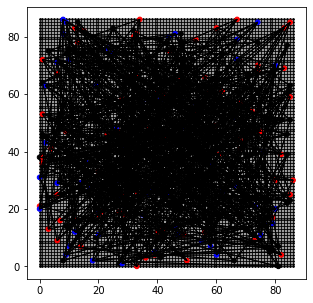

In [84]:
pos = np.array([[{'x':i,'y':j} for i in range(int(5*np.sqrt(n)))] for j in range(int(5*np.sqrt(n)))]).flatten()
grid = np.array([[0 for i in range(int(5*np.sqrt(n)))] for j in range(int(5*np.sqrt(n)))])

initial_pos = random.sample(list(pos), n)
for i in range(n):
    pt = (initial_pos[i]['x'], initial_pos[i]['y'])
    G.nodes[i]['x'] = pt[0]
    G.nodes[i]['y'] = pt[1]
    grid[pt[0]][pt[1]] = i+1

print_graph(G, edges=True)

In [85]:
def find_nearest_available(x, y):
    n = len(grid[0])
    visited = np.zeros((n,n))

    queue = [(x, y)]
    for _ in range(n**2):
        x, y = queue.pop(0)
        
        if (not grid[x][y]):
            return (x, y)
        
        pot_nbrs = [(x, y+1), (x, y-1), (x+1, y), (x-1, y)]
        for nbr in pot_nbrs:
            new_x, new_y = nbr
            if ((0 <= new_x < n) and (0 <= new_y < n)):
                if (not visited[new_x][new_y]):
                    queue.append(nbr)
                    visited[new_x][new_y] = True


def points_with_manhattan_distance(p, d):
    n = len(grid[0])
    result = []
    for i in range(-d, d+1):
        for j in range(-d, d+1):
            new_x, new_y = (p[0]+i, p[1]+j)
            if ((manhattan(p, (new_x, new_y)) <= d)
                and (0 <= new_x < n) and (0 <= new_y < n) and (not grid[new_x][new_y])):
                result.append((new_x, new_y))
    return result


# def swap_nodes(p):
#     print(p)
#     n = len(grid[0])
#     x, y = p
#     v1 = grid[x][y]
#     pot_nbrs = [(x, y+1), (x, y-1), (x+1, y), (x-1, y)]
#     for nbr in pot_nbrs:
#         new_x, new_y = nbr
#         if ((0 <= new_x < n) and (0 <= new_y < n) and (grid[new_x][new_y])):
#             v2 = grid[new_x][new_y]

#             if (v1.tot_edge_len(p) + v2.tot_edge_len(nbr) > v1.tot_edge_len(nbr) + v2.tot_edge_len(p)):
#                 v1.x = new_x
#                 v1.y = new_y
#                 v2.x = x
#                 v2.y = y
#                 grid[x][y] = v2
#                 grid[new_x][new_y] = v1



def compact(dir, gamma):
    def S(dir):
        edges = []
        for i in range(len(grid[0])):
            if (dir): # horizontal
                nodes = np.where(grid[:,i])[0]
                for j in range(len(nodes)-1):
                    edges.append((grid[nodes[j]][i]-1, grid[nodes[j+1]][i]-1))
            else: # vertical
                nodes = np.where(grid[i])[0]
                for j in range(len(nodes)-1):
                    edges.append((grid[i][nodes[j]]-1, grid[i][nodes[j+1]]-1))
        return edges
    
    def fun(x):
        # x is a list of x (y) coordinates of the nodes
        return sum([(x[edge[0]] - x[edge[1]])**2 for edge in G.edges()]) #maybe abs value
    
    x = [v[1]['x'] for v in G.nodes(data=True)] if dir else [v[1]['y'] for v in G.nodes(data=True)]
    vis_edges = S(dir)

    res = minimize(fun, x0=x, method="SLSQP", 
                   constraints=[{'type': 'ineq', 'fun': lambda x, e=e: x[e[1]] - x[e[0]] - gamma} for e in vis_edges],
                   bounds=[(0, len(grid[0])-1) for _ in range(len(x))])

    for i, p in enumerate((res.x).astype(int)):
        v = G.nodes[i]
        if (dir):
            v['x'] = p
        else:
            v['y'] = p


def compact_osqp(dir, gamma):
    def S(dir, gamma):
        edges = []
        for i in range(len(grid[0])):
            if (dir): # horizontal
                nodes = np.where(grid[:,i])[0]
                gamma_p = min(gamma, len(grid[0])//len(nodes)) if len(nodes) else 0
                for j in range(len(nodes)-1):
                    edges.append((grid[nodes[j]][i]-1, grid[nodes[j+1]][i]-1, gamma_p))
            else: # vertical
                nodes = np.where(grid[i])[0]
                gamma_p = min(gamma, len(grid[0])//len(nodes)) if len(nodes) else 0
                for j in range(len(nodes)-1):
                    edges.append((grid[i][nodes[j]]-1, grid[i][nodes[j+1]]-1, gamma_p))
        return edges
    
    vis = S(dir, gamma)

    A1 = np.zeros((len(vis), G.number_of_nodes()))
    l1 = np.zeros(len(vis))

    for i, e in enumerate(vis):
        A1[i][e[1]] = 1
        A1[i][e[0]] = -1
        l1[i] = e[2]

    A2 = np.eye(G.number_of_nodes())
    l2 = np.zeros(G.number_of_nodes())

    A = np.vstack([A1, A2])
    l = np.concatenate([l1, l2])
    u = np.full(len(vis) + G.number_of_nodes(), int(5*np.sqrt(n))-1)
    
    q = np.zeros(G.number_of_nodes())
    A = sparse.csc_matrix(A)
    l = l
    u = u

    prob = osqp.OSQP()
    prob.setup(P, q, A, l, u, alpha=1.0, verbose=False)
    res = prob.solve()
    
    for i, p in enumerate((res.x).astype(int)):
        v = G.nodes[i]
        if (dir):
            v['x'] = p
        else:
            v['y'] = p


def manhattan(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def tot_edge_len(v, p):
    return sum([manhattan(p, (G.nodes[nbr]['x'], G.nodes[nbr]['y'])) for nbr in G.neighbors(v)])

In [86]:
# j = 0

# %timeit np.median([G.nodes[v]['x'] for v in G.neighbors(j)])
# # nbrMedY = np.median([G.nodes[v]['y'] for v in G.neighbors(j)])
# # %timeit v = G.nodes[j]
# %timeit x = int(min(max(nbrMedX + random.uniform(-T, T), 0), int(5*np.sqrt(n))-1))
# x, y = (5, 5)
# %timeit new_x, new_y = find_nearest_available(x, y)
# %timeit d = manhattan((x,y), (new_x, new_y))
# %timeit pot_locs = points_with_manhattan_distance((new_x, new_y), d+1)
# pot_loc = (5, 5)
# %timeit tmp_dist = tot_edge_len(j, (pot_loc[0], pot_loc[1]))

In [87]:
iters = int(90*np.sqrt(n))
T = int(2*np.sqrt(n))
k = (0.2/T)**(1/iters)
compactDir = True

for i in range(iters//2):
    print(i, iters//2)
    for j in range(G.number_of_nodes()):
        # print(sum([manhattan((G.nodes[edge[0]]['x'], G.nodes[edge[0]]['y']), 
        #                      (G.nodes[edge[1]]['x'], G.nodes[edge[1]]['y'])) for edge in G.edges()]), 
        #                      np.count_nonzero(grid))
        nbrMedX = np.median([G.nodes[v]['x'] for v in G.neighbors(j)])
        nbrMedY = np.median([G.nodes[v]['y'] for v in G.neighbors(j)])

        v = G.nodes[j]
        x = int(min(max(nbrMedX + random.uniform(-T, T), 0), int(5*np.sqrt(n))-1))
        y = int(min(max(nbrMedY + random.uniform(-T, T), 0), int(5*np.sqrt(n))-1))

        new_x, new_y = find_nearest_available(x, y)
        d = manhattan((x,y), (new_x, new_y))
        pot_locs = points_with_manhattan_distance((new_x, new_y), d+1)

        dist = np.inf
        for pot_loc in pot_locs:
            tmp_dist = tot_edge_len(j, (pot_loc[0], pot_loc[1]))
            if (tmp_dist < dist):
                dist = tmp_dist
                new_x, new_y = pot_loc

        if ((v['x'], v['y']) == (new_x, new_y)):
            print("should swap")
        if (tot_edge_len(j, (new_x, new_y)) < tot_edge_len(j, (v['x'], v['y']))):
            grid[v['x']][v['y']] = 0
            v['x'] = new_x
            v['y'] = new_y
            grid[new_x][new_y] = j+1

    if (i % 5 == 0):
        # compact(compactDir, 3)
        compact_osqp(compactDir, 3)
        compactDir = not compactDir

        grid = np.array([[0 for i in range(int(5*np.sqrt(n)))] for j in range(int(5*np.sqrt(n)))])

        for j in range(G.number_of_nodes()):
            grid[G.nodes[j]['x']][G.nodes[j]['y']] = j+1

    T *= k

# compact(True, 3)
# compact(False, 3)
compact_osqp(True, 3)
grid = np.array([[0 for i in range(int(5*np.sqrt(n)))] for j in range(int(5*np.sqrt(n)))])

for j in range(G.number_of_nodes()):
    grid[G.nodes[j]['x']][G.nodes[j]['y']] = j+1
compact_osqp(False, 3)
grid = np.array([[0 for i in range(int(5*np.sqrt(n)))] for j in range(int(5*np.sqrt(n)))])

for j in range(G.number_of_nodes()):
    grid[G.nodes[j]['x']][G.nodes[j]['y']] = j+1

    

for i in range(iters//2+1):
    print(i, iters//2+1)
    for j in range(G.number_of_nodes()):
        # print(sum([manhattan((G.nodes[edge[0]]['x'], G.nodes[edge[0]]['y']), 
        #                      (G.nodes[edge[1]]['x'], G.nodes[edge[1]]['y'])) for edge in G.edges()]), 
        #                      np.count_nonzero(grid))
        nbrMedX = np.median([G.nodes[v]['x'] for v in G.neighbors(j)])
        nbrMedY = np.median([G.nodes[v]['y'] for v in G.neighbors(j)])

        v = G.nodes[j]
        x = int(min(max(nbrMedX + random.uniform(-T, T), 0), int(5*np.sqrt(n))-1))
        y = int(min(max(nbrMedY + random.uniform(-T, T), 0), int(5*np.sqrt(n))-1))

        new_x, new_y = find_nearest_available(x, y)
        d = manhattan((x,y), (new_x, new_y))
        pot_locs = points_with_manhattan_distance((new_x, new_y), d+1)

        dist = np.inf
        for pot_loc in pot_locs:
            tmp_dist = tot_edge_len(j, (pot_loc[0], pot_loc[1]))
            if (tmp_dist < dist):
                dist = tmp_dist
                new_x, new_y = pot_loc

        if ((v['x'], v['y']) == (new_x, new_y)):
            print("should swap2")
        if (tot_edge_len(j, (new_x, new_y)) < tot_edge_len(j, (v['x'], v['y']))):
            grid[v['x']][v['y']] = 0
            v['x'] = new_x
            v['y'] = new_y
            grid[new_x][new_y] = j+1

    if (i % 5 == 0):
        
        # print_graph(n,gg)
        # compact(compactDir, max(1, 1+(2*(iters//2-i-30)/(0.5*iters))))
        compact_osqp(compactDir, max(1, 1+(2*(iters//2-i-30)/(0.5*iters))))
        compactDir = not compactDir

        grid = np.array([[0 for i in range(int(5*np.sqrt(n)))] for j in range(int(5*np.sqrt(n)))])

        for j in range(G.number_of_nodes()):
            grid[G.nodes[j]['x']][G.nodes[j]['y']] = j+1

    T *= k

0 784
1 784
2 784
3 784
4 784
5 784
6 784
7 784
8 784
9 784
10 784
11 784
12 784
13 784
14 784
15 784
16 784
17 784
18 784
19 784
20 784
21 784
22 784
23 784
24 784
25 784
26 784
27 784
28 784
29 784
30 784
31 784
32 784
33 784
34 784
35 784
36 784
37 784
38 784
39 784
40 784
41 784
42 784
43 784
44 784
45 784
46 784
47 784
48 784
49 784
50 784
51 784
52 784
53 784
54 784
55 784
56 784
57 784
58 784
59 784
60 784
61 784
62 784
63 784
64 784
65 784
66 784
67 784
68 784
69 784
70 784
71 784
72 784
73 784
74 784
75 784
76 784
77 784
78 784
79 784
80 784
81 784
82 784
83 784
84 784
85 784
86 784
87 784
88 784
89 784
90 784
91 784
92 784
93 784
94 784
95 784
96 784
97 784
98 784
99 784
100 784
101 784
102 784
103 784
104 784
105 784
106 784
107 784
108 784
109 784
110 784
111 784
112 784
113 784
114 784
115 784
116 784
117 784
118 784
119 784
120 784
121 784
122 784
123 784
124 784
125 784
126 784
127 784
128 784
129 784
130 784
131 784
132 784
133 784
134 784
135 784
136 784
137 784
138 78

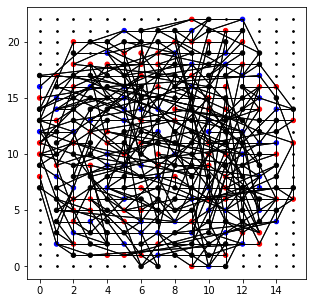

In [88]:
print_graph(G, edges=True)

In [89]:
from mec import make_circle
rs = []

for i in range(H.shape[0]):
    pts = []
    qbts = np.where(H[i])[0]
    for qbt in qbts:
        pts.append((G.nodes[qbt]['x'], G.nodes[qbt]['y']))
    if (len(pts)):
        rs.append(make_circle(pts)[2])
        print(rs[i])

5.385164807134505
3.004626062886658
2.0155644370746373
6.576473218982952
5.70087712549569
3.664662612862977
3.6055512754639896
1.8027756377319948
1.5811388300841898
3.6400549446402595
4.031128874149275
1.5811388300841898
6.519202405202649
1.838477631085024
6.0
3.3541019662496847
2.6925824035672523
3.1622776601683795
2.6925824035672523
3.5355339059327378
3.0413812651491092
1.666666666666667
3.6400549446402595
2.5495097567963927
5.522680508593631
2.5495097567963927
4.0
6.041666666666667
2.5495097567963927
3.8078865529319543
6.519202405202649
4.6097722286464435
4.527692569068709
3.1622776601683795
7.0178344238091
4.47213595499958
8.0156097709407
3.8078865529319543
1.666666666666667
1.5811388300841898
6.020797289396147
1.821078397711709
7.5
1.1785113019775795
2.0615528128088303
2.304886114323222
4.031128874149275
5.522680508593631
3.1622776601683795
5.220153254455275
3.2015621187164243
2.6925824035672523
7.648529270389178
5.70087712549569
3.905124837953328
5.220153254455275
3.1622776601683

(array([12., 19., 35., 30.,  9.,  9., 10., 12.,  6.,  2.]),
 array([1.1785113 , 1.923794  , 2.66907669, 3.41435939, 4.15964208,
        4.90492478, 5.65020747, 6.39549017, 7.14077286, 7.88605556,
        8.63133825]),
 <BarContainer object of 10 artists>)

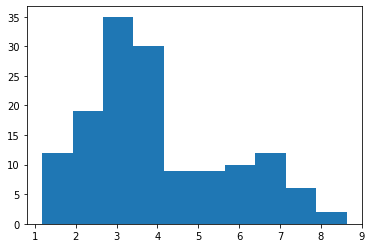

In [90]:
plt.hist(rs)